In [1]:
# Importing libraries (Data Manipulation & Data Visualization purpose)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Importing the data set
Mushroom = pd.read_excel('mushrooms.xlsx')

In [14]:
# Checking how many columns and rows in the data set
Mushroom.shape

(8124, 23)

In [8]:
# Using head() function to see the first five rows of the data set
Mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [10]:
# Checking the missing values in the data set
Mushroom.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [13]:
# Checking if there is any null values in the dataset
Mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Text(0.5, 1.0, 'Number of poisonous/edible mushrooms (0=edible(e), 1=poisonous(p))')

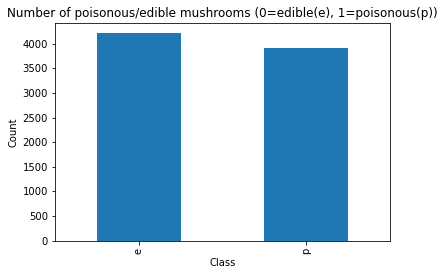

In [74]:
# Creating a histogram to compare two values ("Poisonous" / "Edible") -> Checking if the data is balanced
plt.figure()
pd.Series(Mushroom['class']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("Class")
plt.title('Number of poisonous/edible mushrooms (0=edible(e), 1=poisonous(p))')

In [75]:
# Separating features from target
x = Mushroom.drop(["class"], axis=1)
y = Mushroom["class"]

In [76]:
# Using dummy variable to do encoding process for x 
x = pd.get_dummies(x)
x.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [23]:
# Using LabelEncoder for y ( p --> 1, e --> 0)
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[1 0 0 ... 0 1 0]


In [50]:
# Splitting Dataset into training and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [51]:
x_train.shape, x_test.shape

((5686, 117), (2438, 117))

In [52]:
y_train.shape, y_test.shape

((5686,), (2438,))

In [53]:
# Downloading a decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
# Using the Decision Tree Classifier with splitting criterion as Gini impurity
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

In [56]:
# fit the model
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [57]:
clf_gini.score(x_train, y_train)

0.9859303552585297

In [58]:
# Predicting the test data
predictions = clf_gini.predict(x_test)

In [59]:
predictions

array([1, 0, 0, ..., 1, 1, 1])

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9835931091058244

In [79]:
# Predicing the values 
y_pred_gini = clf_gini.predict(x_test)

In [80]:
# Predicing the value using x_train for accuracy comparision 
y_pred_train_gini = clf_gini.predict(x_train)
y_pred_train_gini

array([1, 0, 1, ..., 0, 0, 0])

In [81]:
# Determining the accuracy score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
# Accuracy Score for training set
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Model accuracy score with criterion gini index: 0.9836
Training-set accuracy score: 0.9859


[Text(450.69230769230774, 475.65000000000003, 'X[27] <= 0.5\ngini = 0.499\nsamples = 5686\nvalue = [2936, 2750]'),
 Text(240.3692307692308, 339.75, 'X[53] <= 0.5\ngini = 0.28\nsamples = 3203\nvalue = [540, 2663]'),
 Text(120.1846153846154, 203.85000000000002, 'X[55] <= 0.5\ngini = 0.129\nsamples = 2831\nvalue = [196, 2635]'),
 Text(60.0923076923077, 67.94999999999999, 'gini = 0.046\nsamples = 2698\nvalue = [63, 2635]'),
 Text(180.27692307692308, 67.94999999999999, 'gini = 0.0\nsamples = 133\nvalue = [133, 0]'),
 Text(360.55384615384617, 203.85000000000002, 'X[94] <= 0.5\ngini = 0.139\nsamples = 372\nvalue = [344, 28]'),
 Text(300.4615384615385, 67.94999999999999, 'gini = 0.0\nsamples = 28\nvalue = [0, 28]'),
 Text(420.6461538461539, 67.94999999999999, 'gini = 0.0\nsamples = 344\nvalue = [344, 0]'),
 Text(661.0153846153847, 339.75, 'X[100] <= 0.5\ngini = 0.068\nsamples = 2483\nvalue = [2396, 87]'),
 Text(600.923076923077, 203.85000000000002, 'X[63] <= 0.5\ngini = 0.029\nsamples = 2432\n

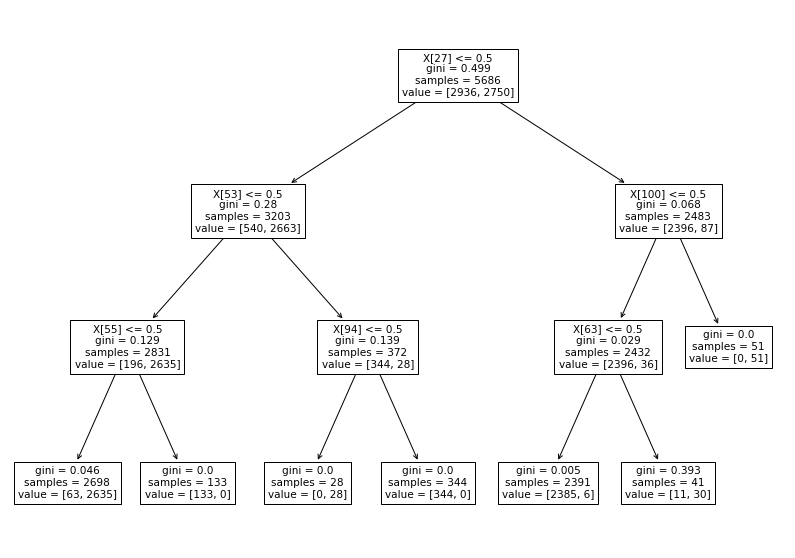

In [61]:
# Plot the tree
plt.figure(figsize=(14,10))
tree.plot_tree(clf_gini.fit(x_train, y_train)) 

In [62]:
# Creating a Decision Tree using with entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [63]:
# Fit the model
clf_en.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

[Text(372.0, 475.65000000000003, 'X[27] <= 0.5\nentropy = 0.999\nsamples = 5686\nvalue = [2936, 2750]'),
 Text(223.20000000000002, 339.75, 'X[20] <= 0.5\nentropy = 0.654\nsamples = 3203\nvalue = [540, 2663]'),
 Text(148.8, 203.85000000000002, 'X[53] <= 0.5\nentropy = 0.979\nsamples = 924\nvalue = [540, 384]'),
 Text(74.4, 67.94999999999999, 'entropy = 0.923\nsamples = 580\nvalue = [196, 384]'),
 Text(223.20000000000002, 67.94999999999999, 'entropy = 0.0\nsamples = 344\nvalue = [344, 0]'),
 Text(297.6, 203.85000000000002, 'entropy = 0.0\nsamples = 2279\nvalue = [0, 2279]'),
 Text(520.8000000000001, 339.75, 'X[100] <= 0.5\nentropy = 0.219\nsamples = 2483\nvalue = [2396, 87]'),
 Text(446.40000000000003, 203.85000000000002, 'X[63] <= 0.5\nentropy = 0.111\nsamples = 2432\nvalue = [2396, 36]'),
 Text(372.0, 67.94999999999999, 'entropy = 0.025\nsamples = 2391\nvalue = [2385, 6]'),
 Text(520.8000000000001, 67.94999999999999, 'entropy = 0.839\nsamples = 41\nvalue = [11, 30]'),
 Text(595.2, 203.

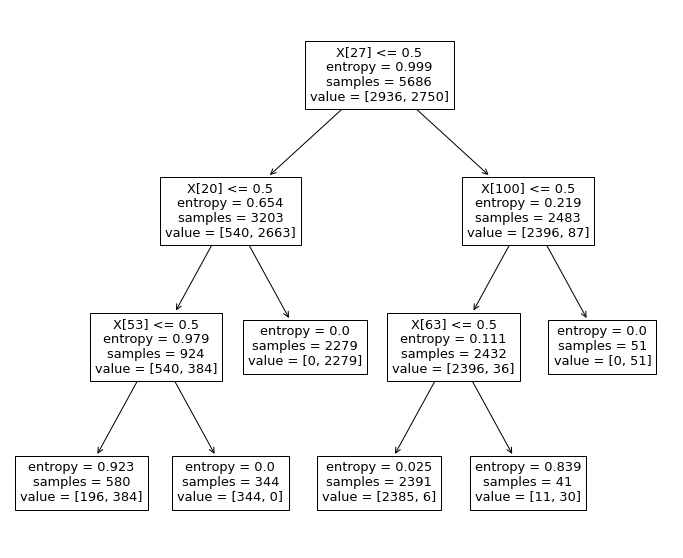

In [64]:
plt.figure(figsize=(12,10))
tree.plot_tree(clf_en.fit(x_train, y_train)) 

In [65]:
# Predicting the values 
y_pred_en = clf_en.predict(x_test)

In [66]:
# Predicting the value using x_train for accuracy comparision
y_pred_train_en = clf_en.predict(x_train)

In [67]:
# Printing the scores on training and test set
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Model accuracy score with criterion entropy: 0.9594
Training-set accuracy score: 0.9625


In [68]:
# Creating a Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import  f1_score

In [69]:
cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1175   97]
 [   2 1164]]


In [70]:
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1272
           1       0.92      1.00      0.96      1166

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438



In [71]:
f1_score = f1_score(y_test, y_pred_en)
print("F1 Score:",f1_score)

F1 Score: 0.9592088998763906
